<a href="https://colab.research.google.com/github/sverdoot/optimizer-SUG-torch/blob/master/plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Optimization project/")
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Optimization project'

In [0]:
%matplotlib inline
import torch
from torch import nn
from torch import optim
from torch.autograd import Variable
import time
import pandas as pd
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler

In [0]:
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

import pandas as pd

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

device

device(type='cuda', index=0)

In [0]:
lrs = [0.05, 0.01, 0.005]

## FC

In [0]:
fc_sug = torch.load('./MNIST/FCsug')
fc_sgd = {}
for lr in lrs:
    fc_sgd[lr] = torch.load('./MNIST/FC'+str(lr))

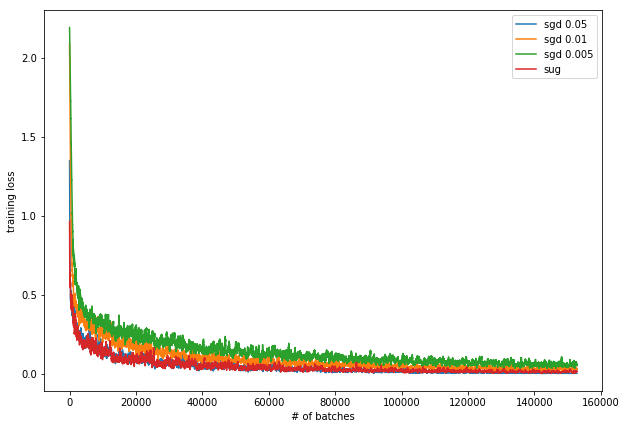

In [0]:
figure = plt.figure(figsize=(10,7))
for lr in lrs:
    loss = fc_sgd[lr]['tr_loss']
    plt.plot([np.mean(loss[i:i+200]) for i in range(len(loss)-200)], label='sgd '+str(lr))
plt.plot([np.mean(fc_sug['tr_loss'][i:i+200]) for i in range(len(fc_sug['tr_loss'])-200)], label="sug")
plt.xlabel("# of batches")
plt.ylabel("training loss")
plt.legend()
plt.show()

In [0]:
n_epochs = fc_sug['epoch']

In [0]:
batch_per_ep = int(len(fc_sug['tr_loss']) / fc_sug['epoch'])
batch_per_ep

12750

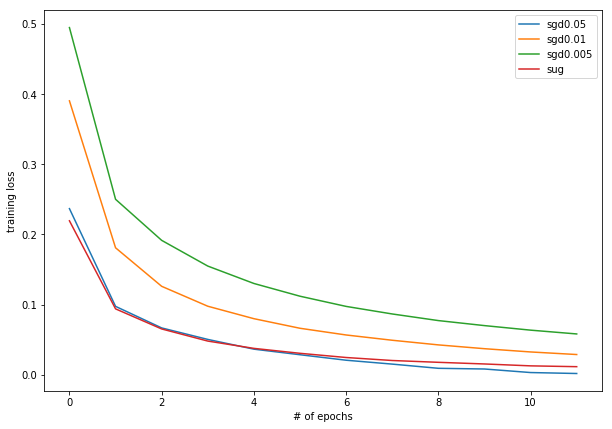

In [0]:
figure = plt.figure(figsize=(10,7))
for lr in lrs:
    loss = fc_sgd[lr]['tr_loss']
    plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label='sgd '+str(lr))
plt.plot([sum(fc_sug['tr_loss'][i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label="sug")
plt.xlabel("# of epochs")
plt.ylabel("training loss")
plt.legend()
plt.show()

In [0]:
batch_per_ep = int(len(fc_sug['val_loss']) / fc_sug['epoch'])
batch_per_ep

2250

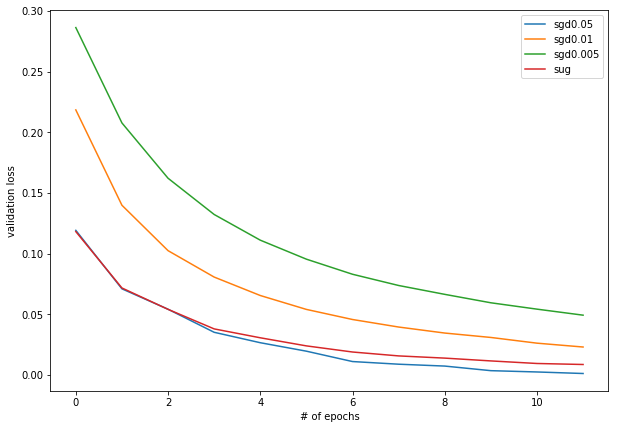

In [0]:
figure = plt.figure(figsize=(10,7))
for lr in lrs:
    loss = fc_sgd[lr]['val_loss']
    plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label='sgd '+str(lr))
plt.plot([sum(fc_sug['val_loss'][i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label="sug")
plt.xlabel("# of epochs")
plt.ylabel("validation loss")
plt.legend()
plt.show()

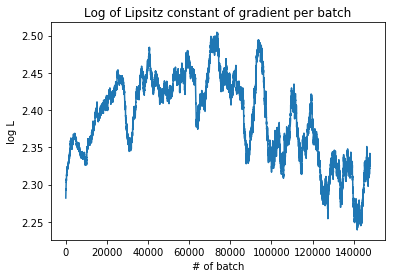

In [0]:
lips = fc_sug['lips']
smooth_over = 5000
smooth_lips = [np.mean(lips[i:i+smooth_over]) for i in range(len(lips)-smooth_over)]

plt.plot(np.log(smooth_lips))
plt.title("Log of Lipsitz constant of gradient per batch")
plt.xlabel("# of batch")
plt.ylabel("log L")
#plt.legend()
plt.show()

## CIFAR10


In [0]:
fc_sug = torch.load('./CIFAR10/CNNsug20')
lrs = [0.01, 0.005]
fc_sgd = {}
for lr in lrs:
    fc_sgd[lr] = torch.load('./CIFAR10/CNN_'+str(lr)+'_30')

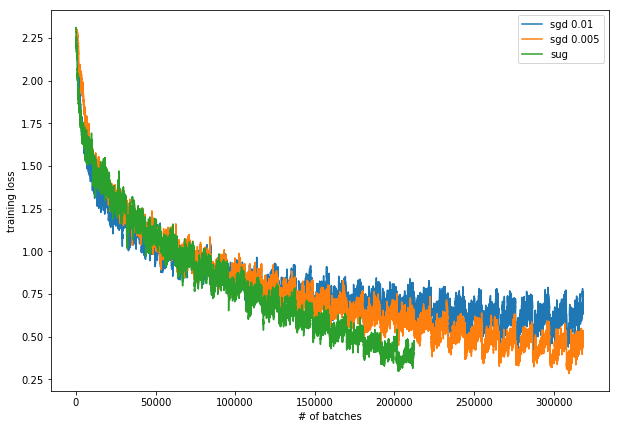

In [22]:
# plot train loss per 200 batches
smooth_over = 200
figure = plt.figure(figsize=(10,7))
for lr in lrs:
    loss = fc_sgd[lr]['tr_loss']
    plt.plot([np.mean(loss[i:i+smooth_over]) for i in range(len(loss)-smooth_over)], label='sgd '+str(lr))
plt.plot([np.mean(fc_sug['tr_loss'][i:i+smooth_over]) for i in range(len(fc_sug['tr_loss'])-smooth_over)], label="sug")
plt.xlabel("# of batches")
plt.ylabel("training loss")
plt.legend()
plt.show()

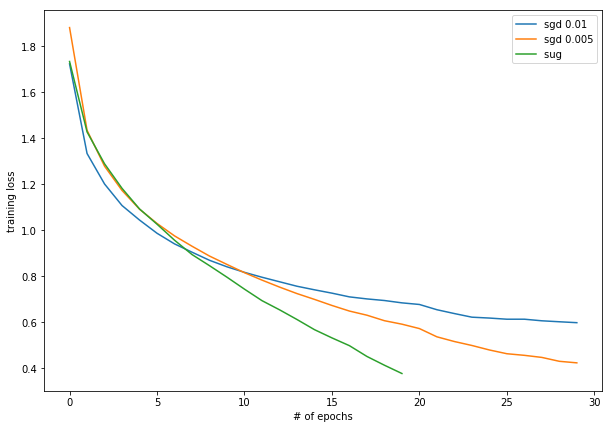

In [23]:
#plot train loss per epoch
figure = plt.figure(figsize=(10,7))
for lr in lrs:
    n_epochs = fc_sgd[lr]['epoch']
    batch_per_ep = int(len(fc_sgd[lr]['tr_loss']) / fc_sgd[lr]['epoch'])
    loss = fc_sgd[lr]['tr_loss']
    plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label='sgd '+str(lr))
n_epochs = fc_sug['epoch']
batch_per_ep = int(len(fc_sug['tr_loss']) / fc_sug['epoch'])
plt.plot([sum(fc_sug['tr_loss'][i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label="sug ")
plt.xlabel("# of epochs")
plt.ylabel("training loss")
plt.legend()
plt.show()

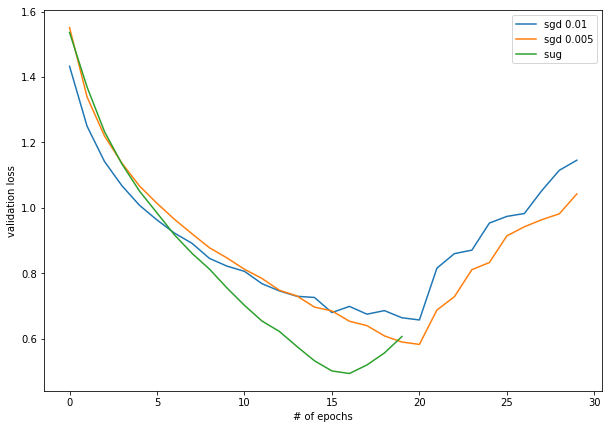

In [24]:
#plot val loss per epoch
figure = plt.figure(figsize=(10,7))
for lr in lrs:
    n_epochs = fc_sgd[lr]['epoch']
    batch_per_ep = int(len(fc_sgd[lr]['val_loss']) / fc_sgd[lr]['epoch'])
    loss = fc_sgd[lr]['val_loss']
    plt.plot([sum(loss[i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label='sgd '+str(lr))
n_epochs = fc_sug['epoch']
batch_per_ep = int(len(fc_sug['val_loss']) / fc_sug['epoch'])
plt.plot([sum(fc_sug['val_loss'][i*batch_per_ep:(i+1)*batch_per_ep])/batch_per_ep for i in range(n_epochs)], label="sug ")
plt.xlabel("# of epochs")
plt.ylabel("validation loss")
plt.legend()
plt.show()

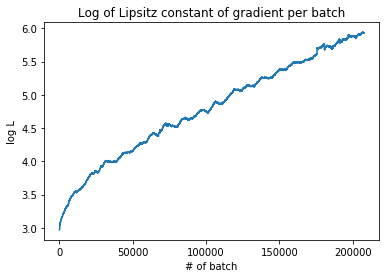

In [25]:
lips = fc_sug['lips']
smooth_over = 5000
smooth_lips = [np.mean(lips[i:i+smooth_over]) for i in range(len(lips)-smooth_over)]

plt.plot(np.log(smooth_lips))
plt.title("Log of Lipsitz constant of gradient per batch")
plt.xlabel("# of batch")
plt.ylabel("log L")
plt.show()